In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# import the mutualfund dataset
mutual_fund_data = pd.read_csv('Top100MutualFunds.csv')
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [3]:
# select 'Morningstar Category' column and count the number of time each value appears in the column
mutual_fund_data['Morningstar Category'].value_counts()

Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: Morningstar Category, dtype: int64

In [4]:
#group the data in the "mutual_fund_data" by the values in the "Morningstar Category" column,
# and then calculate the mean of the numerical columns for each group.
mutual_fund_data.groupby('Morningstar Category').mean()

C:\Users\akoto\AppData\Local\Temp\ipykernel_13884\4247182235.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mutual_fund_data.groupby('Morningstar Category').mean()


,Morningstar Rating
Morningstar Category,
Communications,5.000000
Health,5.000000
Large Blend,3.250000
Large Growth,3.755102
Large Value,3.750000
Mid-Cap Blend,4.000000
Mid-Cap Growth,4.333333
Mid-Cap Value,3.000000
Small Value,4.000000


In [5]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime

# Create an empty dictionary to store mutual fund data
mutual_fund_dict = {}

# Extract a list of symbols from the 'Symbol' column of the mutual_fund_data DataFrame
symbols = list(mutual_fund_data['Symbol'])

# Define the start and end dates for the time period of interest
start = datetime(1980, 1, 1)
end = datetime(2020, 1, 1)

# Print the start and end dates, as well as the list of symbols
print(start, end, symbols)


1980-01-01 00:00:00 2020-01-01 00:00:00 ['AGTHX', 'FCNTX', 'CWMAX', 'CWMCX', 'CWMEX', 'CWMFX', 'AIVSX', 'AWSHX', 'ANCFX', 'AMCFX', 'CAFAX', 'CAFCX', 'CAFEX', 'CAFFX', 'FMACX', 'TRBCX', 'AFMFX', 'AMRFX', 'CMLAX', 'CMLCX', 'CMLEX', 'CMLFX', 'FDGRX', 'FBGRX', 'AMCPX', 'EAGRX', 'AMRMX', 'FMAGX', 'HACAX', 'FLPSX', 'PRGFX', 'PRNHX', 'DFQTX', 'DFEOX', 'FLPKX', 'RPMGX', 'FOCPX', 'CNGAX', 'CNGCX', 'CNGEX', 'CNGFX', 'FNEFX', 'FOCKX', 'DFLVX', 'CDDRX', 'CDDYX', 'CDIRX', 'CVIRX', 'TWCUX', 'EGFFX', 'EGFIX', 'ANEFX', 'HLIEX', 'FRDPX', 'FRDAX', 'FRDRX', 'FRISX', 'PRHSX', 'PRILX', 'DDFIX', 'DDFRX', 'VAFAX', 'PCBIX', 'FCGAX', 'FGSRX', 'FIFRX', 'PRFDX', 'PRBLX', 'JVMIX', 'VWNFX', 'FKGRX', 'PRDGX', 'AULDX', 'AULGX', 'AULNX', 'AULRX', 'AULYX', 'AKRSX', 'MFEIX', 'POLIX', 'FKDNX', 'MADVX', 'VWUSX', 'LSGRX', 'SEEGX', 'PRMTX', 'CUSUX', 'ERASX', 'ERSMX', 'DFSVX', 'CMGIX', 'SBLYX', 'AKRIX', 'MFEGX', 'FDNRX', 'FDTRX', 'FDYZX', 'BBVLX', 'PEYAX', 'TWCGX']


In [6]:
# Override pandas datareader to use Yahoo Finance as the data source
yf.pdr_override()

# Use the get_data_yahoo function from pandas datareader to retrieve mutual fund data 
# from Yahoo Finance for the specified symbols and time period
fund_data = web.get_data_yahoo(symbols, start, end)


[*********************100%***********************]  100 of 100 completed


In [7]:
# Extract the 'Adj Close' column from the fund_data DataFrame and store it in a new variable called close_data
close_data = fund_data['Adj Close']
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,0.599536,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,0.588704,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730548,...,0.595769,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733576,...,0.580032,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751739,...,0.586269,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097599,43.498634,33.953674,41.269047,41.468193,28.316504,28.111414,38.230667,38.514618,51.184910,...,42.597168,80.298607,43.188068,32.569069,106.341026,29.883804,43.968906,14.698990,29.131344,36.265900
2019-12-26,38.185295,43.719612,34.099628,41.387012,41.586231,28.408524,28.203419,38.318680,38.603241,51.416252,...,42.654209,80.374329,43.536552,32.785183,107.248009,30.146877,44.383232,14.812883,29.243479,36.535656
2019-12-27,38.211613,43.711113,34.099628,41.441452,41.640713,28.400156,28.186691,38.345081,38.629822,51.465824,...,42.504475,80.290184,43.512787,32.761169,107.316467,30.130440,44.357864,14.819583,29.243479,36.501934


In [8]:
# Use the get_data_yahoo function from Pandas datareader to retrieve the 'Adj Close' values 
# for the S&P 500 index from Yahoo Finance for the specified time period, 
# and store the resulting data in a new column of the close_data DataFrame called 'S&P 500'
close_data['S&P 500'] = web.get_data_yahoo('^GSPC', start, end)['Adj Close']


[*********************100%***********************]  1 of 1 completed


C:\Users\akoto\AppData\Local\Temp\ipykernel_13884\2460838394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data['S&P 500'] = web.get_data_yahoo('^GSPC', start, end)['Adj Close']


In [9]:
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897,105.760002
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897,105.220001
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730548,...,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897,106.519997
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733576,...,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897,106.809998
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751739,...,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897,108.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097599,43.498634,33.953674,41.269047,41.468193,28.316504,28.111414,38.230667,38.514618,51.184910,...,80.298607,43.188068,32.569069,106.341026,29.883804,43.968906,14.698990,29.131344,36.265900,3223.379883
2019-12-26,38.185295,43.719612,34.099628,41.387012,41.586231,28.408524,28.203419,38.318680,38.603241,51.416252,...,80.374329,43.536552,32.785183,107.248009,30.146877,44.383232,14.812883,29.243479,36.535656,3239.909912
2019-12-27,38.211613,43.711113,34.099628,41.441452,41.640713,28.400156,28.186691,38.345081,38.629822,51.465824,...,80.290184,43.512787,32.761169,107.316467,30.130440,44.357864,14.819583,29.243479,36.501934,3240.020020


Text(0.5, 1.0, 'Index Returns Relative to Market Returns')

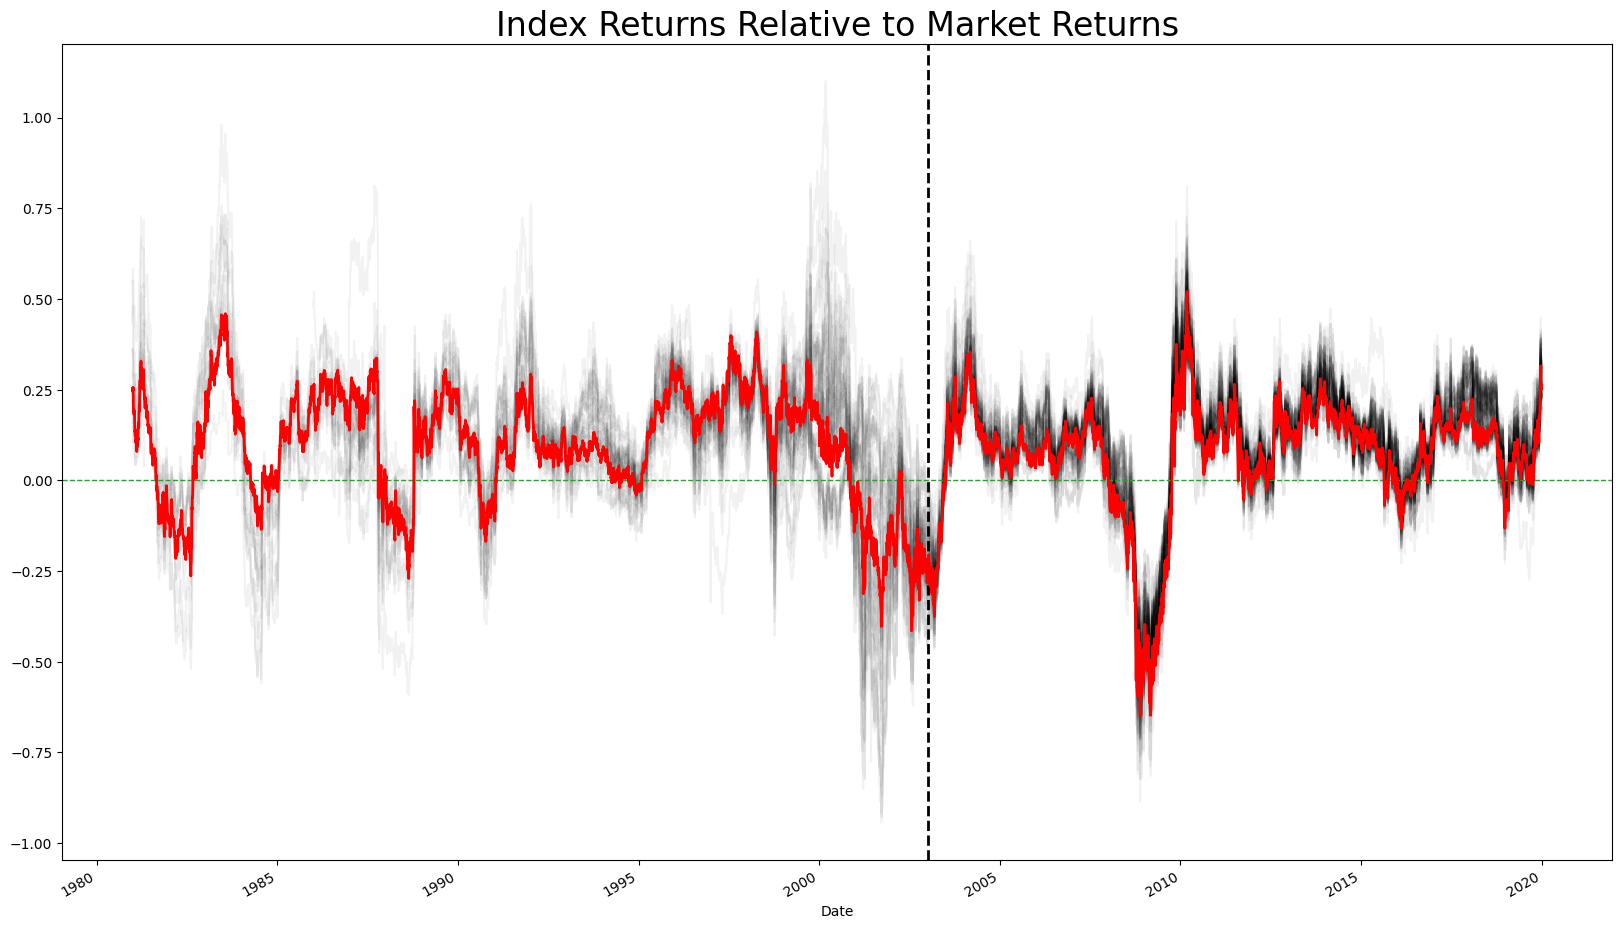

In [10]:
import matplotlib.pyplot as plt

# Calculate the year-over-year returns using the log differences of the close_data DataFrame 
# over a period of 251 trading days (i.e., one year)
yoy_return = np.log(close_data).diff(251)

# Create a new figure with a specified size, and plot the year-over-year returns 
# for each mutual fund in the close_data DataFrame using a line plot with a low alpha value
fig, ax = plt.subplots(figsize=(20, 12))
yoy_return.plot.line(legend=False, color='k', alpha=.05, ax=ax)

# Add a horizontal line at y = 0 to represent zero percent returns, with a dashed line style and a specified color and linewidth
ax.axhline(0, ls='--', color='C2', linewidth=1)
ax.axvline('2003', ls = '--', color = 'k', linewidth = 2)

# Overlay the year-over-year returns for the S&P 500 index as a separate line plot with a different color and linewidth
yoy_return['S&P 500'].plot.line(color='Red', linewidth=2, ax=ax)
plt.rcParams.update({'font.size' : 20})
ax.set_title('Index Returns Relative to Market Returns')


Text(0.5, 1.0, 'Index Returns Relative to Market Returns')

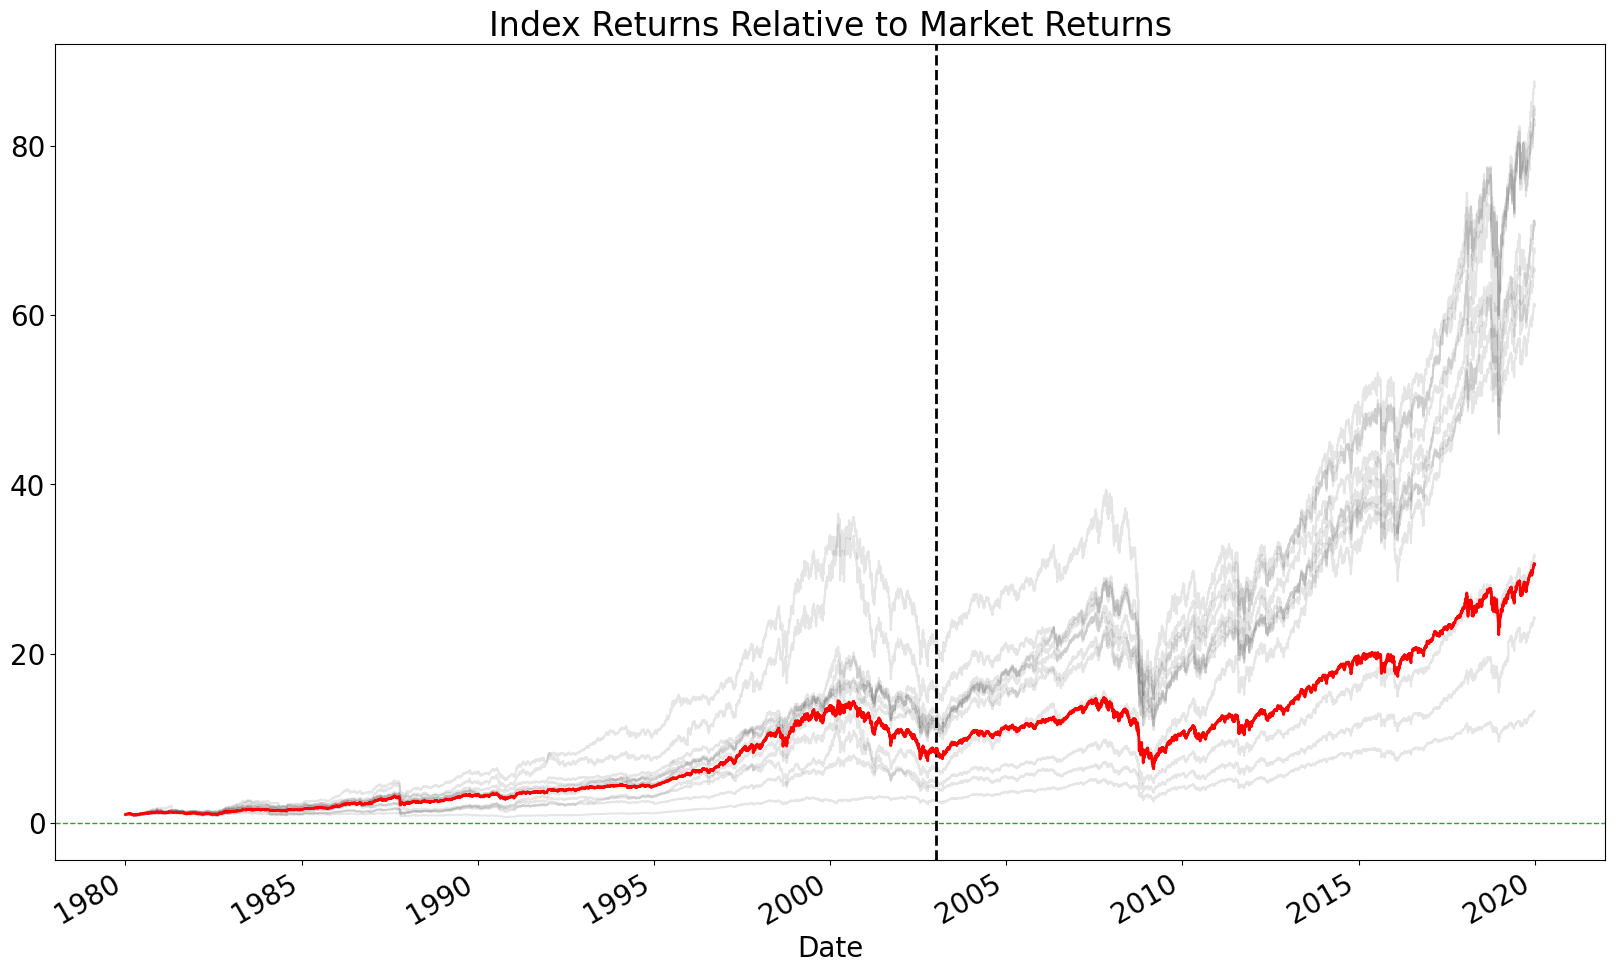

In [11]:
norm_data = close_data.div(close_data.iloc[0])
fig, ax = plt.subplots(figsize = (20, 12))
norm_data.plot.line(legend = False, color = 'k', alpha = .1, ax = ax)
ax.axhline(0, ls = '--', color = 'C2', linewidth = 1)
ax.axvline('2003', ls = '--', color = 'k', linewidth = 2)

norm_data['S&P 500'].plot.line(color='Red', linewidth=2, ax=ax)
plt.rcParams.update({'font.size' : 20})
ax.set_title('Index Returns Relative to Market Returns')

## Hypothesis Testing and Confidence Intervals

In [12]:
monthly_closed_data = close_data.resample('M').first()
monthly_closed_data.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,35.126392,39.759945,30.990509,39.542534,39.713707,25.792032,25.624296,35.268578,35.560001,46.166386,...,76.018021,40.260963,30.476660,99.783806,27.435659,39.930309,13.367850,26.328794,33.576427,2953.560059
2019-09-30,35.185398,38.784580,30.445385,40.388554,40.560371,25.256033,25.087616,35.319347,35.611183,45.121574,...,74.580856,39.150578,30.370668,97.703735,26.914333,38.901054,13.186357,25.675346,32.912346,2906.270020
2019-10-31,35.645607,38.633915,30.624969,39.771667,39.951832,25.128035,24.959455,35.779800,36.065323,45.679523,...,73.918167,39.294094,29.346062,96.186302,26.883211,39.103664,13.086224,26.262714,32.483128,2940.250000
2019-11-30,36.493099,40.663937,31.833950,40.644115,40.824951,26.328033,26.144951,36.630489,36.913818,48.072186,...,76.337387,40.850151,30.045620,100.013977,28.065916,41.202698,13.774642,27.672396,33.916561,3066.909912
2019-12-31,36.976177,41.718605,32.544640,40.555988,40.745579,27.064039,26.873867,37.106873,37.385201,49.166870,...,77.942230,41.703709,31.162085,102.793091,28.867359,42.458878,14.081302,28.127609,34.872189,3113.870117


In [13]:
monthly_returns = np.log(monthly_closed_data).diff()
monthly_returns.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,-0.005504,-0.012487,-0.008626,0.016176,0.016344,-0.015695,-0.016124,-0.005741,-0.005979,-0.009413,...,-0.004088,0.003006,0.005347,-0.000598,0.006259,0.001625,0.002813,-0.005562,-0.003611,-0.003640
2019-09-30,0.001678,-0.024837,-0.017747,0.021170,0.021095,-0.021001,-0.021167,0.001438,0.001438,-0.022891,...,-0.019087,-0.027967,-0.003484,-0.021066,-0.019185,-0.026114,-0.013670,-0.025132,-0.019976,-0.016141
2019-10-31,0.012995,-0.003892,0.005881,-0.015392,-0.015117,-0.005081,-0.005122,0.012953,0.012672,0.012290,...,-0.008925,0.003659,-0.034319,-0.015653,-0.001157,0.005195,-0.007623,0.022619,-0.013127,0.011624
2019-11-30,0.023497,0.051211,0.038718,0.021699,0.021619,0.046650,0.046403,0.023497,0.023254,0.051054,...,0.032204,0.038836,0.023559,0.039023,0.043054,0.052288,0.051269,0.052285,0.043183,0.042176
2019-12-31,0.013151,0.025606,0.022079,-0.002171,-0.001946,0.027572,0.027498,0.012921,0.012689,0.022516,...,0.020805,0.020680,0.036485,0.027408,0.028156,0.030032,0.022018,0.016316,0.027786,0.015196


In [14]:
def t_value_1samp(data, mu):
    x_bar = np.mean(data)
    s = np.std(data)
    n = len(data)
    df = n - 1
    t = (x_bar - mu) / (s / np.sqrt(n))
    return t, df

In [15]:
sp500 = monthly_returns['S&P 500'].dropna()
sp500.mean() * 12

0.08473776816463623

In [16]:
hypothesized_rate = 0.07 / 12
hypothesized_rate

0.005833333333333334

In [17]:
t_value_1samp(data= sp500, mu= hypothesized_rate)

(0.6072595645765047, 478)

In [18]:
stats.ttest_1samp(sp500, hypothesized_rate)

Ttest_1sampResult(statistic=0.6066253507590067, pvalue=0.5443875720700815)

In [19]:
def t_value_ind_samp(a, b, hypothesized_difference=0, equal_var=False):
    
    a = np.array(a)
    b = np.array(b)
    
    s1, n1 = np.var(a) , len(a)
    s2, n2 = np.var(b),  len(b)
    
    # if paired samples, df calculation is different
    if (equal_var):
        df = n1 + n2 - 2
        svar = ((n1 - 1) * s1 + (n2 - 1) * s2) / float(df)
        denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
    else:
        vn1 = s1 / n1
        vn2 = s2 / n2
        df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
        denom = np.sqrt(vn1 + vn2)

    d = np.mean(a) - np.mean(b) - hypothesized_difference
    t = d / denom
    return t, df

In [20]:
prgfx = monthly_returns["PRGFX"].dropna()
sp500.mean(), prgfx.mean()

(0.0070614806803863525, 0.007124728896042549)

In [21]:
t_value_ind_samp(sp500, prgfx)

(-0.021224969392378997, 950.1085741581699)

In [22]:
stats.ttest_ind(sp500, prgfx).statistic

-0.021202802316469697

### The T Probability Distribution

In [23]:
import scipy.special as sc

# define a function to create the actual distribution from which we can analyze our t value from the t test
def t_distribution(df, t): 
    t_dist_val = ((1 + t**2 / df)
                      **(-(df + 1) / 2)) / (sc.beta(.5, .5 * df) * np.sqrt(df))
    return t_dist_val

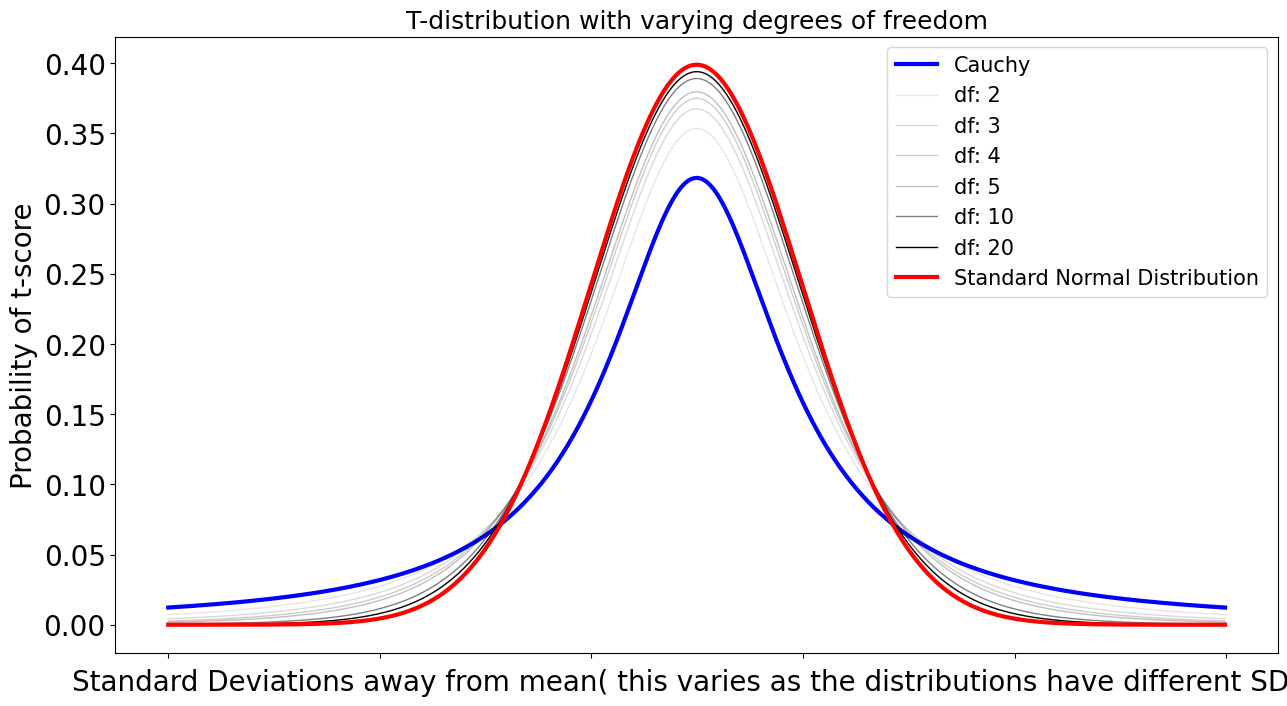

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

x = np.linspace(-5, 5, 1000)
cauchy = t_distribution(1, x)
ax.plot(cauchy, '-', lw=3, alpha=1, label="Cauchy", color='b')
t_df = [2, 3, 4, 5, 10, 20]
for df in t_df:
    dist = t_distribution(df, x)
    ax.plot(dist, '-', lw=1, alpha=df / 20, label="df: " + str(df), color='k')
gaussian = t_distribution(100000, x)
ax.plot(gaussian,
        lw=3,
        alpha=1,
        color='r',
        label='Standard Normal Distribution')
plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel(
    "Standard Deviations away from mean( this varies as the distributions have different SD's)"
)
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels="")
plt.legend()

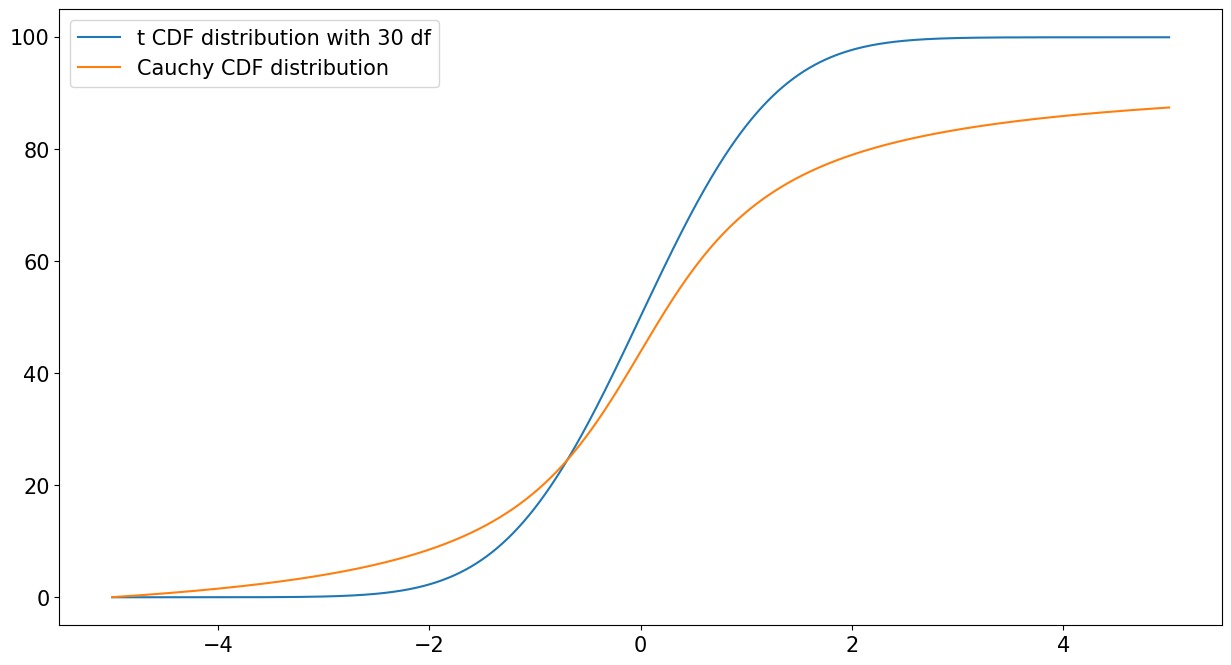

In [25]:
fig, ax = plt.subplots(figsize = (15,8))

x = np.linspace(-5, 5, 1000)
t_dist = t_distribution(150000, x)
cauchy = t_distribution(1, x)

f_dist = t_dist.copy()
cauchy_f_dist = cauchy.copy()

for i in range(len(t_dist)): 
    f_dist[i] += f_dist[i-1]
    cauchy_f_dist[i] += cauchy_f_dist[i-1]

ax.plot(x, f_dist, label = 't CDF distribution with 30 df')
ax.plot(x, cauchy_f_dist, label = 'Cauchy CDF distribution')

plt.legend()

In [26]:
import scipy.stats as stats

# function that allows us to evaluate the t distribution at a given t value and df
def t_test(a, b, kind):
    
    if kind == 'one_sample': 
            t_val, df = t_value_1samp(a, b)
            print (t_val, df)
    elif kind  == 'independent': 
            t_val, df = t_value_ind_samp(a, b)
    elif kind == 'paired': 
            t_val, df = t_value_ind_samp(a, b, equal_var=True)
            
    # cdf gives probability of a value at least as extreme as observed happening; for two-sided tests this is doubled
    p_value = (1-stats.t.cdf(np.abs(t_val), df-1))  *2
    
    if p_value > .05:
        return_string = 'T-value: ' + str(t_val) + ', P-value: ' + str(
            p_value) + ', Fail to reject null hypothesis.'
    else:
        return_string = 'T-value: ' + str(t_val) + ', P-value: ' + str(
            round(p_value, 5)) + ', Reject null hypothesis.'
        
    return return_string

In [27]:
hypothesized_rate = 0.07 / 12
t_test(sp500, hypothesized_rate, 'one_sample')

0.6072595645765047 478


'T-value: 0.6072595645765047, P-value: 0.5439676244389173, Fail to reject null hypothesis.'

### Testing for Normality

In [28]:
from stats import * 
def jarque_bera_test(series, use_sample_ks = False):
    series.dropna(inplace = True)
    print(series)
    n = series.shape[0]

    k = kurtosis(series, sample = use_sample_ks)
    s = skewness(series, sample = use_sample_ks)
    t = n / 6 * (s ** 2 + (k - 3) ** 2 / 4)

    df = n - 1
    print(k, s, t)
    p = scipy.stats.t.sf(t, df=df)
    return t, p

In [31]:
from statsmodels.stats.stattools import jarque_bera
import scipy
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import numpy as np

yf.pdr_override()
start = datetime(2012, 1, 1)
end = datetime.today()

stock_data = {}
stocks = ['MSFT', 'AAPL', 'PG', 'TSLA', '^GSPC']
for key in stocks:
    stock_data[key] = web.get_data_yahoo(key, start, end)['Close']
stock_data = pd.DataFrame(stock_data).rename(columns = {'^GSPC':'S&P500'})
price_change_data = np.log(stock_data).diff()
price_change_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MSFT,AAPL,PG,TSLA,S&P500
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.023261,0.005360,-0.000449,-0.013264,0.000188
2012-01-05,0.010167,0.011041,-0.004201,-0.021522,0.002939
2012-01-06,0.015415,0.010400,-0.002408,-0.007773,-0.002540
2012-01-09,-0.013250,-0.001587,0.004211,0.012556,0.002259
...,...,...,...,...,...
2023-03-31,0.014851,0.015523,0.008375,0.060504,0.014333
2023-04-03,-0.003718,0.007672,0.005500,-0.063119,0.003692
2023-04-04,-0.000174,-0.003255,0.004804,-0.011308,-0.005814


In [32]:
for key, val in price_change_data.items():
    print(key)
    print("My JB Function:   ", jarque_bera_test(val))
    print("scipy JB Function:", jarque_bera(val)[:2])

MSFT
Date
2012-01-04    0.023261
2012-01-05    0.010167
2012-01-06    0.015415
2012-01-09   -0.013250
2012-01-10    0.003598
                ...   
2023-03-31    0.014851
2023-04-03   -0.003718
2023-04-04   -0.000174
2023-04-05   -0.009938
2023-04-06    0.025212
Name: MSFT, Length: 2833, dtype: float64
11.708485616216645 -0.22023148583539848 8974.912052880522
My JB Function:    (8974.912052880522, 0.0)
scipy JB Function: (8974.912052880576, 0.0)
AAPL
Date
2012-01-04    0.005360
2012-01-05    0.011041
2012-01-06    0.010400
2012-01-09   -0.001587
2012-01-10    0.003574
                ...   
2023-03-31    0.015523
2023-04-03    0.007672
2023-04-04   -0.003255
2023-04-05   -0.011355
2023-04-06    0.005481
Name: AAPL, Length: 2833, dtype: float64
8.720345897813129 -0.27844272657553815 3899.208827904875
My JB Function:    (3899.208827904875, 0.0)
scipy JB Function: (3899.2088279048817, 0.0)
PG
Date
2012-01-04   -0.000449
2012-01-05   -0.004201
2012-01-06   -0.002408
2012-01-09    0.004211


In [33]:
def t_quintile(df, alpha):
    q = (1 + alpha) / 2
    a = stats.t.ppf(q, df)
    return a

In [34]:
def confidence_interval(data, alpha):
    n = len(data)
    df = n - 1
    x_bar = np.mean(data)
    SE = np.std(data) / np.sqrt(n)
    CI_quintile = t_quintile(df, alpha)
    CI = x_bar - CI_quintile * SE, x_bar + CI_quintile * SE
    return CI

In [35]:
sp500_CI = confidence_interval(sp500, 0.05)
sp500_CI

(0.006934593241426297, 0.007188368119346408)

In [36]:
sp500_yearly_CI = (1 + sp500_CI[0]) ** 12, (1 + sp500_CI[1]) ** 12

In [37]:
sp500_yearly_CI

(1.0864634873490415, 1.0897538656572028)

In [38]:
yearly_close_data = pd.DataFrame(close_data).resample("Y").first()
yearly_changes = np.log(yearly_close_data).diff()
yearly_changes

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-12-31,NaN,0.373945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.219248,...,NaN,NaN,NaN,NaN,0.444489,NaN,NaN,NaN,0.292461,0.253979
1982-12-31,NaN,-0.020713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010941,...,NaN,NaN,NaN,NaN,-0.155439,-0.012121,NaN,NaN,-0.008201,-0.105083
1983-12-31,NaN,0.192325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270906,...,NaN,NaN,NaN,NaN,0.013849,0.258291,NaN,NaN,0.181910,0.119646
1984-12-31,NaN,0.207397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250166,...,NaN,NaN,NaN,NaN,0.230556,0.247645,NaN,NaN,0.050682,0.170396
1985-12-31,NaN,-0.087750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007459,...,NaN,NaN,NaN,NaN,-0.244129,-0.258695,NaN,NaN,-0.022556,0.008075
1986-12-31,NaN,0.171687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221965,...,NaN,NaN,NaN,NaN,0.299125,0.243880,NaN,0.103741,0.230367,0.236968
1987-12-31,NaN,0.112440,0.024667,NaN,NaN,NaN,0.040800,NaN,0.121338,0.038209,...,NaN,NaN,NaN,NaN,0.496225,0.117398,NaN,0.172814,-0.087273,0.162006
1988-12-31,NaN,0.004728,0.002422,NaN,NaN,NaN,0.056241,NaN,0.017346,-0.016120,...,NaN,NaN,NaN,NaN,0.137327,0.085508,NaN,-0.001301,-0.351368,0.037784


In [39]:
yearly_return_CIs = confidence_interval(yearly_changes, 0.05)

c:\Users\akoto\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


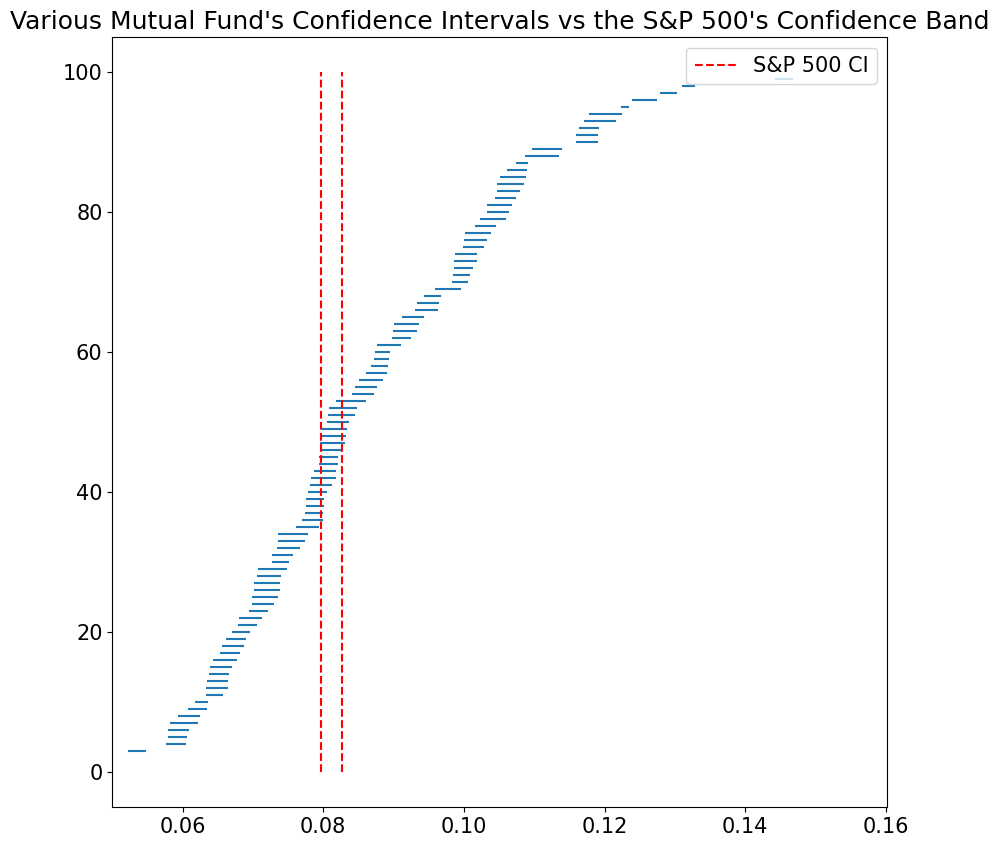

In [40]:
fig, ax = plt.subplots(figsize = (10, 10))
Y_axis = np.arange(len(yearly_return_CIs[0]))

ax.hlines(y = Y_axis, xmin = yearly_return_CIs[0].sort_values(), xmax = yearly_return_CIs[1].sort_values() )
ax.vlines(x = [yearly_return_CIs[0]["S&P 500"],yearly_return_CIs[1]["S&P 500"]], ymin = 0, ymax = 100, label = "S&P 500 CI", color="r", linestyle="--")
ax.set_title("Various Mutual Fund's Confidence Intervals vs the S&P 500's Confidence Band")
ax.set_xlim(0.05)
ax.legend()

### ANOVA

In [41]:
mutual_fund_data[['Symbol', 'Morningstar Category']]

,Symbol,Morningstar Category
0,AGTHX,Large Growth
1,FCNTX,Large Growth
2,CWMAX,Large Blend
3,CWMCX,Large Blend
4,CWMEX,Large Blend
...,...,...
95,FDTRX,Large Growth
96,FDYZX,Large Growth
97,BBVLX,Large Value
98,PEYAX,Large Value


In [42]:
mutual_fund_data['Morningstar Category'].value_counts()

Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: Morningstar Category, dtype: int64

In [43]:
mutual_fund_data['Morningstar Category'].value_counts() > 2

Large Growth       True
Large Value        True
Large Blend        True
Mid-Cap Growth     True
Mid-Cap Value     False
Health            False
Mid-Cap Blend     False
Communications    False
Small Value       False
Name: Morningstar Category, dtype: bool

In [45]:
fund_types = mutual_fund_data['Morningstar Category'].value_counts() > 2
relevant_fund_types = fund_types[fund_types]
relevant_funds = mutual_fund_data[mutual_fund_data['Morningstar Category'].isin(relevant_fund_types.index)]
relevant_funds

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [46]:
relevant_fund_type_names = {}
for fund_type in relevant_fund_types.index:
    relevant_fund_type_names[fund_type] = relevant_funds["Symbol"][relevant_funds["Morningstar Category"] == fund_type]

In [47]:
relevant_fund_type_names

{'Large Growth': 0     AGTHX
 1     FCNTX
 9     AMCFX
 10    CAFAX
 11    CAFCX
 12    CAFEX
 13    CAFFX
 14    FMACX
 15    TRBCX
 22    FDGRX
 23    FBGRX
 24    AMCPX
 25    EAGRX
 27    FMAGX
 28    HACAX
 30    PRGFX
 36    FOCPX
 37    CNGAX
 38    CNGCX
 39    CNGEX
 40    CNGFX
 41    FNEFX
 42    FOCKX
 48    TWCUX
 49    EGFFX
 50    EGFIX
 51    ANEFX
 61    VAFAX
 63    FCGAX
 64    FGSRX
 65    FIFRX
 70    FKGRX
 72    AULDX
 73    AULGX
 74    AULNX
 75    AULRX
 76    AULYX
 77    AKRSX
 78    MFEIX
 79    POLIX
 80    FKDNX
 82    VWUSX
 83    LSGRX
 84    SEEGX
 91    SBLYX
 92    AKRIX
 93    MFEGX
 94    FDNRX
 95    FDTRX
 96    FDYZX
 99    TWCGX
 Name: Symbol, dtype: object,
 'Large Value': 16    AFMFX
 17    AMRFX
 18    CMLAX
 19    CMLCX
 20    CMLEX
 21    CMLFX
 26    AMRMX
 43    DFLVX
 44    CDDRX
 45    CDDYX
 46    CDIRX
 47    CVIRX
 52    HLIEX
 59    DDFIX
 60    DDFRX
 66    PRFDX
 69    VWNFX
 81    MADVX
 97    BBVLX
 98    PEYAX
 Name: Symbol, d

In [48]:
fund_type_returns = {}

for key in relevant_fund_type_names.keys():
    
    fund_type_returns[key] = []
    
    for val in relevant_fund_type_names[key]:
        
        fund_type_returns[key].extend(monthly_returns[val].dropna())

In [49]:
[print(f"{key}: {np.mean(fund_type_returns[key])}") for key in fund_type_returns]

Large Growth: 0.008346027125338374
Large Value: 0.0070251389920609275
Large Blend: 0.007410825619228297
Mid-Cap Growth: 0.009292540122177347


[None, None, None, None]

0        0.110001
1       -0.021053
2       -0.130497
3        0.015038
4        0.071973
           ...   
12708    0.006259
12709   -0.019185
12710   -0.001157
12711    0.043054
12712    0.028156
Length: 12713, dtype: float64
7.337050675981284 -0.8754090770154273 11587.56725343304

JB Test: (11587.56725343304, 0.0)
0      -0.006682
1       0.044580
2      -0.013514
3       0.003654
4       0.018837
          ...   
4607   -0.006512
4608   -0.014809
4609    0.024449
4610    0.048732
4611    0.013062
Length: 4612, dtype: float64
7.398929173922013 -0.9939021737416001 4477.856905536129

JB Test: (4477.856905536129, 0.0)
0       0.031264
1       0.016649
2      -0.017699
3      -0.025174
4      -0.057644
          ...   
4249   -0.008641
4250   -0.020459
4251    0.010769
4252    0.041017
4253    0.019436
Length: 4254, dtype: float64
6.45956489633304 -0.9328008577188215 2738.3457135254635

JB Test: (2738.3457135254635, 0.0)
0       0.042570
1      -0.020140
2      -0.122194
3       0.03816

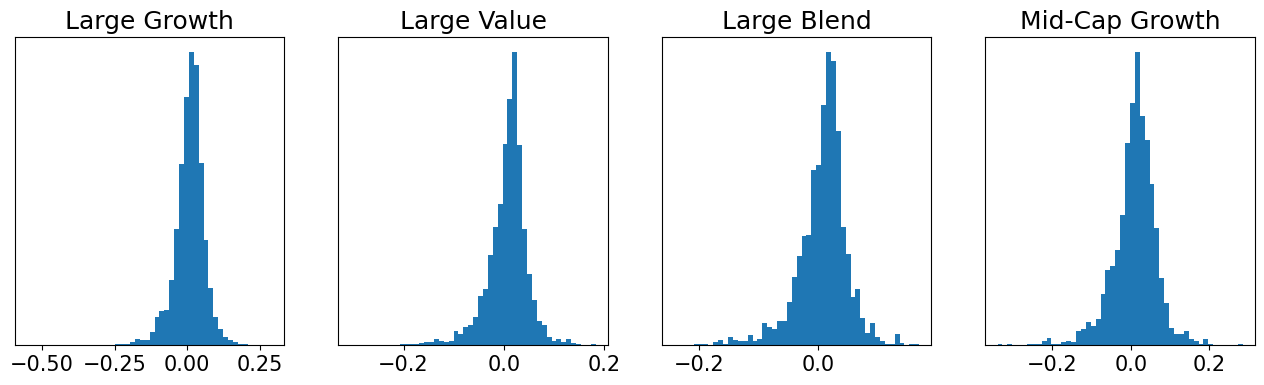

In [51]:
fig, axs = plt.subplots(1, 4 , figsize = (16, 4))
for num, key in enumerate(fund_type_returns):
    series = pd.Series(fund_type_returns[key])
    axs[num].hist(series, bins = 50)
    axs[num].set_title(key)
    axs[num].set_yticks([])
    print('\nJB Test: ' + str(jarque_bera_test(series)))

In [52]:
def get_anova_counts(*args):
    k = len(args)
    N = 0
    for arg in args:
        N += len(arg)
    dfbn = k - 1
    dfwn = N - k

    return k, N, dfbn, dfwn

In [53]:
get_anova_counts(fund_type_returns['Large Growth'],
                 fund_type_returns['Large Value'],
                 fund_type_returns['Large Blend'],
                 fund_type_returns['Mid-Cap Growth'])

(4, 23079, 3, 23075)

In [54]:
def SSB(*args):
    ssb = 0
    alldata = np.concatenate(args)

    grand_mean = np.mean(alldata)

    for arg in args:
        group_mean = np.mean(arg)

        n = len(arg)
        val = n * (group_mean - grand_mean)**2

        ssb += val

    return ssb

In [55]:
SSB(fund_type_returns["Large Growth"], fund_type_returns['Large Value'],
    fund_type_returns['Large Blend'], fund_type_returns['Mid-Cap Growth'])

0.009868750949859936

In [57]:
def SSW(*args):
    ssw = 0
    for arg in args: 
        group_mean = np.mean(arg)
        val = 0 
        for i in arg:
            val += np.sum(i - group_mean)**2
        ssw += val
    return ssw

In [58]:
SSW(fund_type_returns['Large Growth'],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

53.80315990063459

In [60]:
def get_sum_square_stats(*args): 
    ssw = SSW(*args)
    ssb = SSB(*args)
    sst = ssb + ssw
    return ssw, ssb, sst

In [61]:
get_sum_square_stats(fund_type_returns['Large Growth'],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

(53.80315990063459, 0.009868750949859936, 53.81302865158445)

In [62]:
from scipy.stats import f as f_dist
def finish_anova(f, dfwn, dfbn): 
    # use scipy to plug f-value into f distribution to return p-value
     p_value =  1 - f_dist.cdf(f, dfwn, dfbn)
    
     if p_value > .05:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
     else:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."

     return return_string

In [63]:
def anova(*args):
    k, N, dfbn, dfwn  = get_anova_counts(*args)
    
    ssw, ssb, sst = get_sum_square_stats(*args)

    msb = ssb / dfbn
    msw = ssw / dfwn
    f = msb / msw

    return finish_anova(f, dfbn, dfwn)

In [64]:
anova(fund_type_returns['Large Growth'],
      fund_type_returns['Large Value'],
      fund_type_returns['Large Blend'],
      fund_type_returns['Mid-Cap Growth'])

'F-value: 1.4108305694844028, P-value: 0.23745822879570988, Fail to reject null hypothesis.'

In [65]:
stats.f_oneway(fund_type_returns['Large Growth'],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

F_onewayResult(statistic=1.4108305694843999, pvalue=0.23745822879613585)